<a href="https://colab.research.google.com/github/Clemilton2607/Reconstrucao_de_Imagem/blob/main/Autoencoder_HSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RESULTADOS
- Autoencoder 01 -MSE:0.0417
- Auto. CONV 01 - MSE:0.01398
- Auto. CONV 02 - MSE 0.00978
- Auto. CONV 03 - MSE: 0.017352

# Autoencoder 01

## Importações e Google drive


In [ ]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Input
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from zipfile import ZipFile
from tensorflow.keras.utils import load_img, img_to_array
import random
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense
random.seed(10)
print(random.seed(10))

None


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Baixando dataset e manipulando
dataset_dir = os.path.join(os.getcwd(), r'/content/drive')

dataset_train_dir = os.path.join(dataset_dir, r'/content/drive/MyDrive' )
dataset_train_color_len = len(os.listdir(os.path.join(dataset_train_dir, r'/content/drive/MyDrive/color')))



print('Imagem colorido: %s' % dataset_train_color_len)

Imagem colorido: 7126


In [ ]:
# Define o diretório do dataset
dataset_dir = "/content/drive/MyDrive/color"

# Lista todas as imagens do diretório
image_files = os.listdir(dataset_dir)

# Carrega as imagens e as converte em arrays
images = []
for file in image_files:
    img = load_img(os.path.join(dataset_dir, file), target_size=(156,156))
    img_array = img_to_array(img) / 255.0  # Normaliza os valores de pixel para o intervalo [0, 1]
    images.append(img_array)

In [ ]:
# Transformando as imagens em array
df = np.array(images[:2000])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(df, test_size = 0.30, random_state = 0)

In [ ]:
x_train.shape

(4987, 64, 64, 3)

In [ ]:
x_test.shape

(2138, 64, 64, 3)

In [ ]:
# Reshape
# Lembrar que as imagens possuem 3 canais e é 32 por 32, quando for fazer reshape deve fazer essas tres multiplicações
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [ ]:
x_train.shape

(4987, 12288)

In [ ]:
x_test.shape

(2138, 12288)

In [ ]:
# AUTOENCODER 
# Criação do autoencoder
autoencoder = Sequential()

# ENCODE
autoencoder.add(Dense(units = 6144, activation = 'relu', input_dim = 12288))
autoencoder.add(Dense(units = 3072, activation='relu'))
autoencoder.add(Dense(units = 1536, activation='relu'))
autoencoder.add(Dense(units = 768, activation='relu'))
autoencoder.add(Dense(units = 384, activation='relu'))
autoencoder.add(Dense(units = 192, activation='relu'))
autoencoder.add(Dense(units = 96, activation='relu'))
# Decoder
autoencoder.add(Dense(units = 192, activation='relu'))
autoencoder.add(Dense(units = 384, activation='relu'))
autoencoder.add(Dense(units = 768, activation='relu'))
autoencoder.add(Dense(units = 1536, activation='relu'))
autoencoder.add(Dense(units = 3072, activation='relu'))
autoencoder.add(Dense(units = 6144, activation='relu'))
autoencoder.add(Dense(units = 12288, activation='sigmoid'))
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

In [ ]:
h = autoencoder.fit(x_train, x_train,
                epochs=200, batch_size=256, validation_data=(x_test, x_test))

Epoch 1/200
20/20 [==============================] - 12s 156ms/step - loss: 0.0777 - accuracy: 2.0052e-04 - val_loss: 0.0729 - val_accuracy: 0.0000e+00
Epoch 2/200
20/20 [==============================] - 2s 116ms/step - loss: 0.0683 - accuracy: 0.0000e+00 - val_loss: 0.0650 - val_accuracy: 0.0000e+00
Epoch 3/200
20/20 [==============================] - 2s 110ms/step - loss: 0.0631 - accuracy: 0.0000e+00 - val_loss: 0.0636 - val_accuracy: 0.0000e+00
Epoch 4/200
20/20 [==============================] - 2s 108ms/step - loss: 0.0616 - accuracy: 4.0104e-04 - val_loss: 0.0624 - val_accuracy: 4.6773e-04
Epoch 5/200
20/20 [==============================] - 2s 109ms/step - loss: 0.0606 - accuracy: 0.0000e+00 - val_loss: 0.0606 - val_accuracy: 0.0000e+00
Epoch 6/200
20/20 [==============================] - 2s 111ms/step - loss: 0.0593 - accuracy: 0.0014 - val_loss: 0.0591 - val_accuracy: 0.0000e+00
Epoch 7/200
20/20 [==============================] - 2s 114ms/step - loss: 0.0619 - accuracy: 6.0

In [ ]:
autoencoder.history

In [ ]:
dimensao_original = Input(shape=(12288,))
camada_encoder1 = autoencoder.layers[0]
camada_encoder2 = autoencoder.layers[1]
camada_encoder3 = autoencoder.layers[2]
camada_encoder4 = autoencoder.layers[3]

camada_encoder5 = autoencoder.layers[4]
camada_encoder6 = autoencoder.layers[5]
camada_encoder7 = autoencoder.layers[6]


encoder = Model(dimensao_original, camada_encoder7(camada_encoder6(camada_encoder5(camada_encoder4(camada_encoder3(camada_encoder2(camada_encoder1(dimensao_original))))))))

In [ ]:
imagens_codificadas = encoder.predict(x_test)
imagens_decodificadas = autoencoder.predict(x_test)

67/67 [==============================] - 0s 5ms/step


In [ ]:
numero_imagens = 5
imagens_teste = np.random.randint(x_test.shape[0], size=numero_imagens)
plt.figure(figsize=(100, 100))
for i, indice_imagem in enumerate(imagens_teste):
    # Imagem original, nas dimensões 32x32 com 3 canais
    eixo = plt.subplot(30, 30, i + 1)
    plt.imshow(x_test[indice_imagem].reshape(64, 64, 3))
    plt.xticks(())
    plt.yticks(())
    

    # Imagem decodificada, nas dimensões 32x32 com 3 canais
    eixo = plt.subplot(30, 30, 2 * numero_imagens + i + 1)
    plt.imshow(imagens_decodificadas[indice_imagem].reshape(64, 64, 3))
    plt.xticks(())
    plt.yticks(())
plt.show()

In [ ]:
history = []
val_history = []

history.append(h.history['loss'])
val_history.append(h.history['val_loss'])

In [ ]:
plt.subplot(223)
plt.plot(h.history['loss'])
plt.subplot(224)
plt.plot(h.history['val_loss'])
    
plt.show()

In [ ]:
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity
mse = []
m1 = mean_squared_error(x_test, imagens_decodificadas)
print(f"Image 1 MSE : {m1}")

Image 1 MSE : 0.04179247204845713


# Autoencoder 02 ( AJUSTAR )

## Importações e Google drive


In [ ]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Input
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from zipfile import ZipFile
from tensorflow.keras.utils import load_img, img_to_array
import random
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense
random.seed(10)
print(random.seed(10))

None


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Baixando dataset e manipulando
dataset_dir = os.path.join(os.getcwd(), r'/content/drive')

dataset_train_dir = os.path.join(dataset_dir, r'/content/drive/MyDrive' )
dataset_train_color_len = len(os.listdir(os.path.join(dataset_train_dir, r'/content/drive/MyDrive/color')))



print('Imagem colorido: %s' % dataset_train_color_len)

Imagem colorido: 7126


In [ ]:
# Define o diretório do dataset
dataset_dir = "/content/drive/MyDrive/color"

# Lista todas as imagens do diretório
image_files = os.listdir(dataset_dir)

# Carrega as imagens e as converte em arrays
images = []
for file in image_files:
    img = load_img(os.path.join(dataset_dir, file), target_size=(156,156))
    img_array = img_to_array(img) / 255.0  # Normaliza os valores de pixel para o intervalo [0, 1]
    images.append(img_array)

In [ ]:
# Transformando as imagens em array
df = np.array(images[:2000])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(df, test_size = 0.30, random_state = 0)

In [ ]:
x_train.shape

(4987, 64, 64, 3)

In [ ]:
x_test.shape

(2138, 64, 64, 3)

In [ ]:
# Reshape
# Lembrar que as imagens possuem 3 canais e é 32 por 32, quando for fazer reshape deve fazer essas tres multiplicações
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [ ]:
x_train.shape

(4987, 12288)

In [ ]:
x_test.shape

(2138, 12288)

In [ ]:
# AUTOENCODER 
# Criação do autoencoder
autoencoder = Sequential()

# ENCODE
autoencoder.add(Dense(units = 36504, activation = 'relu', input_dim = 73008))
autoencoder.add(Dense(units = 18252, activation='relu'))
autoencoder.add(Dense(units = 9123, activation='relu'))
autoencoder.add(Dense(units = 768, activation='relu'))
autoencoder.add(Dense(units = 384, activation='relu'))
autoencoder.add(Dense(units = 192, activation='relu'))
autoencoder.add(Dense(units = 96, activation='relu'))
# Decoder
autoencoder.add(Dense(units = 192, activation='relu'))
autoencoder.add(Dense(units = 384, activation='relu'))
autoencoder.add(Dense(units = 768, activation='relu'))
autoencoder.add(Dense(units = 1536, activation='relu'))
autoencoder.add(Dense(units = 3072, activation='relu'))
autoencoder.add(Dense(units = 6144, activation='relu'))
autoencoder.add(Dense(units = 12288, activation='sigmoid'))
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

In [ ]:
h = autoencoder.fit(x_train, x_train,
                epochs=200, batch_size=256, validation_data=(x_test, x_test))

In [ ]:
autoencoder.history

In [ ]:
dimensao_original = Input(shape=(12288,))
camada_encoder1 = autoencoder.layers[0]
camada_encoder2 = autoencoder.layers[1]
camada_encoder3 = autoencoder.layers[2]
camada_encoder4 = autoencoder.layers[3]

camada_encoder5 = autoencoder.layers[4]
camada_encoder6 = autoencoder.layers[5]
camada_encoder7 = autoencoder.layers[6]


encoder = Model(dimensao_original, camada_encoder7(camada_encoder6(camada_encoder5(camada_encoder4(camada_encoder3(camada_encoder2(camada_encoder1(dimensao_original))))))))

In [ ]:
imagens_codificadas = encoder.predict(x_test)
imagens_decodificadas = autoencoder.predict(x_test)

In [ ]:
numero_imagens = 5
imagens_teste = np.random.randint(x_test.shape[0], size=numero_imagens)
plt.figure(figsize=(100, 100))
for i, indice_imagem in enumerate(imagens_teste):
    # Imagem original, nas dimensões 32x32 com 3 canais
    eixo = plt.subplot(30, 30, i + 1)
    plt.imshow(x_test[indice_imagem].reshape(64, 64, 3))
    plt.xticks(())
    plt.yticks(())
    
    # Imagem codificada, nas dimensões 16x16 com 3 canais
    # Se multiplicar os três valores teremos o valor mínimo que é 768 pixels
    eixo = plt.subplot(10, 10, numero_imagens + i + 1)
    #plt.imshow(imagens_codificadas[indice_imagem].reshape(16, 16, 3))
    #plt.xticks(())
   # plt.yticks(())

    # Imagem decodificada, nas dimensões 32x32 com 3 canais
    eixo = plt.subplot(30, 30, 2 * numero_imagens + i + 1)
    plt.imshow(imagens_decodificadas[indice_imagem].reshape(64, 64, 3))
    plt.xticks(())
    plt.yticks(())
plt.show()

In [ ]:
history = []
val_history = []

history.append(h.history['loss'])
val_history.append(h.history['val_loss'])

In [ ]:
plt.subplot(223)
plt.plot(h.history['loss'])
plt.subplot(224)
plt.plot(h.history['val_loss'])
    
plt.show()

In [ ]:
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity
mse = []
m1 = mean_squared_error(x_test, imagens_decodificadas)
print(f"Image 1 MSE : {m1}")

Image 1 MSE : 0.04179247204845713


# Convolucional Autoencoder 01




 loss: 0.0139 - accuracy: 0.7908

## Importações e Google drive


In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Input
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from zipfile import ZipFile
from tensorflow.keras.utils import load_img, img_to_array
import random
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense
random.seed(10)
print(random.seed(10))

None


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Baixando dataset e manipulando
dataset_dir = os.path.join(os.getcwd(), r'/content/drive')

dataset_train_dir = os.path.join(dataset_dir, r'/content/drive/MyDrive' )
dataset_train_color_len = len(os.listdir(os.path.join(dataset_train_dir, r'/content/drive/MyDrive/color')))



print('Imagem colorido: %s' % dataset_train_color_len)

Imagem colorido: 7125


In [ ]:
# Define o diretório do dataset
dataset_dir = "/content/drive/MyDrive/color"

# Lista todas as imagens do diretório
image_files = os.listdir(dataset_dir)

# Carrega as imagens e as converte em arrays
images = []
for file in image_files:
    img = load_img(os.path.join(dataset_dir, file), target_size=(156,156))
    img_array = img_to_array(img) / 255.0  # Normaliza os valores de pixel para o intervalo [0, 1]
    images.append(img_array)

In [ ]:
# Transformando as imagens em array
df = np.array(images[:2000])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(df, test_size = 0.30, random_state = 0)

In [ ]:
x_train.shape

(1400, 156, 156, 3)

In [ ]:
x_test.shape

(600, 156, 156, 3)

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
# AUTOENCODER 
autoencoder = Sequential()
# Encoder
autoencoder.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape=(156,156,3)))
autoencoder.add(MaxPooling2D(pool_size = (2,2)))

autoencoder.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size = (2,2), padding='same'))

autoencoder.add(Conv2D(filters = 128, kernel_size= (3,3), activation = 'relu', padding = 'same'))
autoencoder.add(MaxPooling2D(pool_size=(2,2)))


autoencoder.add(Conv2D(filters = 256, kernel_size = (3,3), activation = 'relu', padding='same', strides = (2,2)))

autoencoder.add(Flatten())

autoencoder.add(Reshape((10,10,256)))

# Decoder
autoencoder.add(Conv2D(filters = 256, kernel_size = (3,3), activation = 'relu', padding='same'))
autoencoder.add(UpSampling2D(size = (2,2)))

autoencoder.add(Conv2D(filters =128, kernel_size = (3,3), activation = 'relu', padding='same'))
autoencoder.add(UpSampling2D(size =(2,2)))

autoencoder.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding='same'))
autoencoder.add(UpSampling2D(size = (2,2)))


autoencoder.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
autoencoder.add(UpSampling2D(size = (2,2)))

autoencoder.add(Conv2D(filters = 3, kernel_size = (3,3), activation = 'sigmoid', padding='same'))


autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error',
                    metrics = ['accuracy'])

In [ ]:
autoencoder.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 154, 154, 64)      1792      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 77, 77, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 77, 77, 64)        36928     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 39, 39, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 39, 39, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 19, 19, 128)     

In [ ]:
h = autoencoder.fit(x_train, x_train,
                epochs=100, batch_size=256, validation_data=(x_test, x_test))

Epoch 1/100
6/6 [==============================] - 36s 3s/step - loss: 0.0858 - accuracy: 0.3468 - val_loss: 0.1253 - val_accuracy: 0.4515
Epoch 2/100
6/6 [==============================] - 5s 848ms/step - loss: 0.0841 - accuracy: 0.3532 - val_loss: 0.0777 - val_accuracy: 0.1960
Epoch 3/100
6/6 [==============================] - 5s 899ms/step - loss: 0.0723 - accuracy: 0.3115 - val_loss: 0.0679 - val_accuracy: 0.5110
Epoch 4/100
6/6 [==============================] - 4s 736ms/step - loss: 0.0643 - accuracy: 0.4878 - val_loss: 0.0600 - val_accuracy: 0.4818
Epoch 5/100
6/6 [==============================] - 5s 848ms/step - loss: 0.0573 - accuracy: 0.4662 - val_loss: 0.0526 - val_accuracy: 0.4527
Epoch 6/100
6/6 [==============================] - 4s 747ms/step - loss: 0.0464 - accuracy: 0.4436 - val_loss: 0.0395 - val_accuracy: 0.4421
Epoch 7/100
6/6 [==============================] - 4s 760ms/step - loss: 0.0409 - accuracy: 0.4353 - val_loss: 0.0367 - val_accuracy: 0.4322
Epoch 8/100
6/6

In [ ]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('flatten_6').output)

In [ ]:
imagens_codificadas = encoder.predict(x_test)
imagens_decodificadas = autoencoder.predict(x_test)

19/19 [==============================] - 1s 27ms/step


## Resultados

([], [])

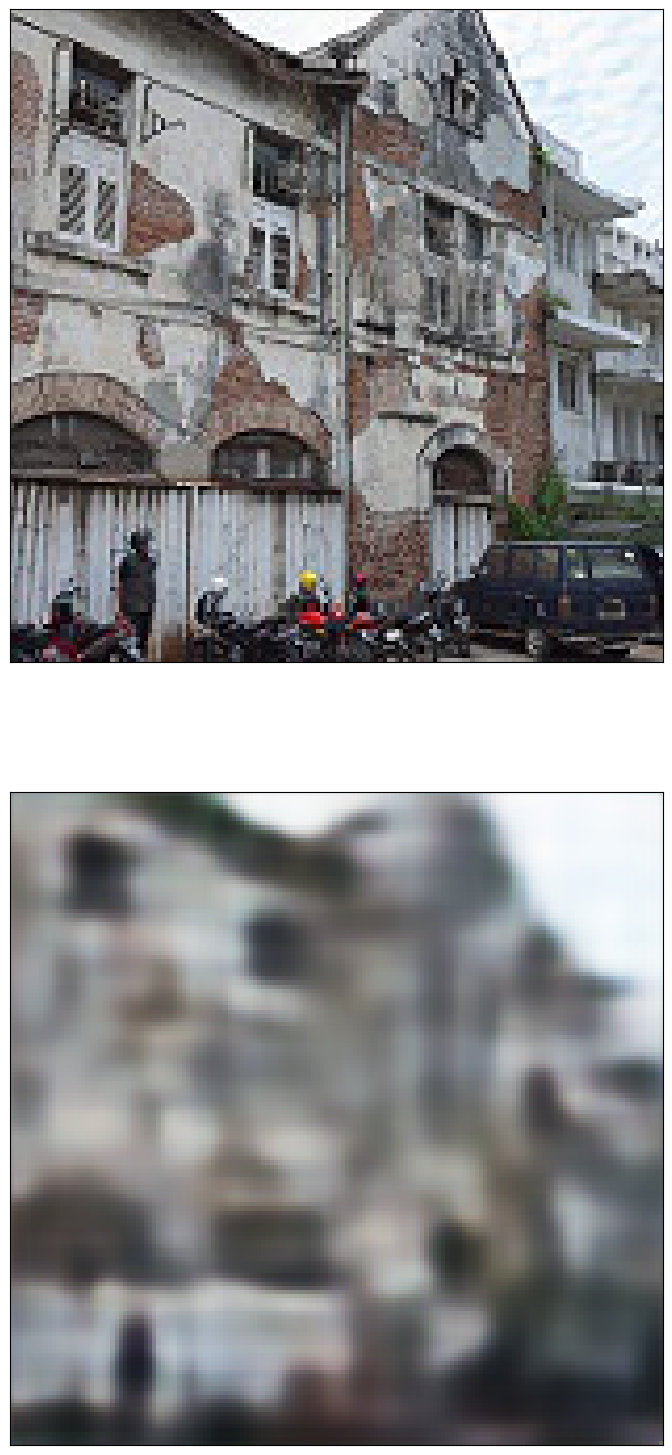

In [ ]:
indice_imagem = 8
plt.figure(figsize=(100, 100))
eixo = plt.subplot(10,10, i + 1)
plt.imshow(x_test[indice_imagem].reshape(156,156, 3))
plt.xticks(())
plt.yticks(())

eixo = plt.subplot(10, 10, 2 * numero_imagens + i + 1)
plt.imshow(imagens_decodificadas[indice_imagem].reshape(156,156, 3))
plt.xticks(())
plt.yticks(())

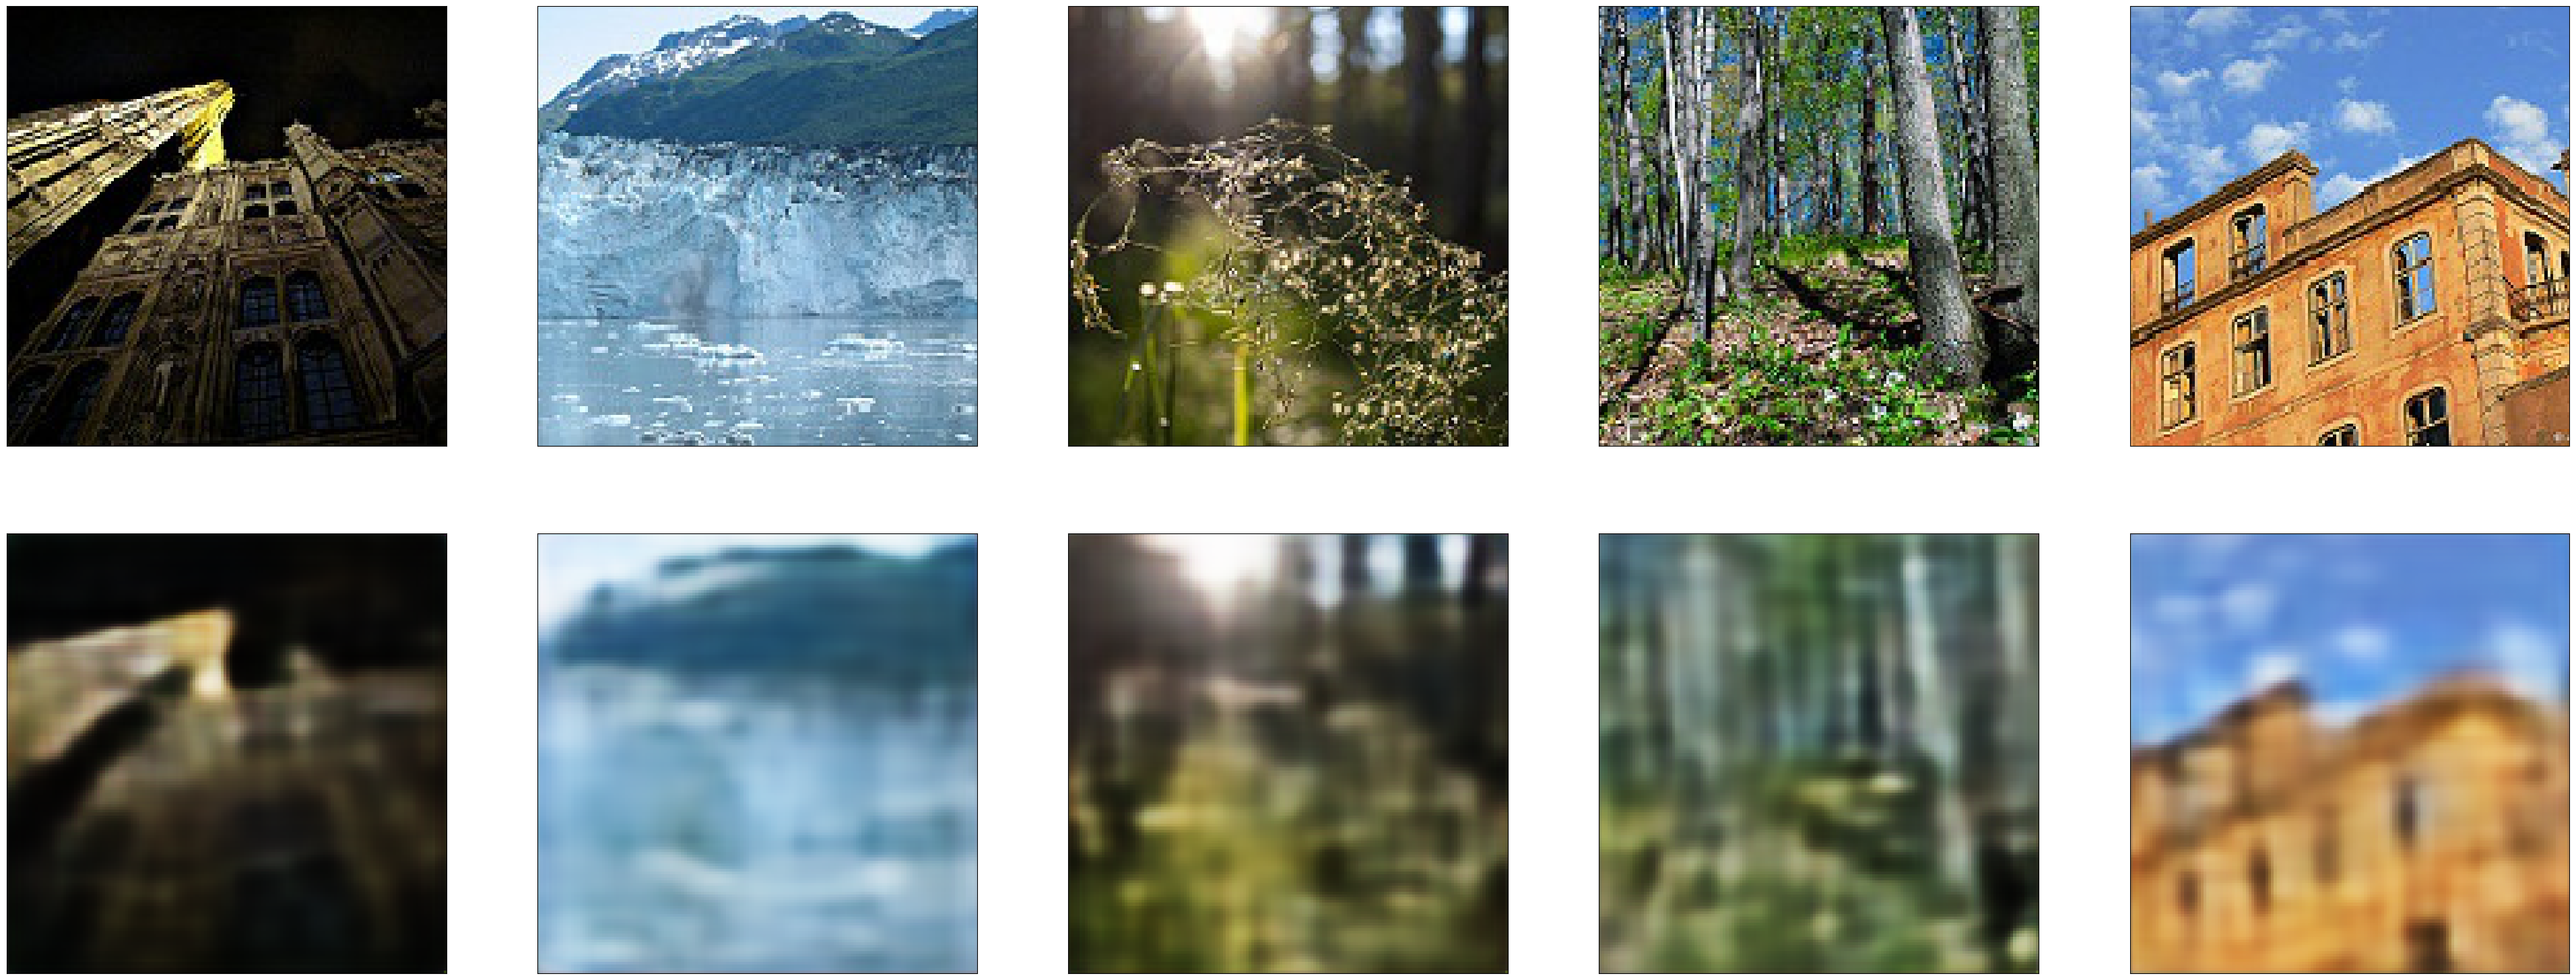

In [ ]:
numero_imagens = 5
imagens_teste = np.random.randint(x_test.shape[0], size=numero_imagens)
plt.figure(figsize=(100, 100))
for i, indice_imagem in enumerate(imagens_teste):
    # Imagem original
    eixo = plt.subplot(10,10, i + 1)
    plt.imshow(x_test[indice_imagem].reshape(156,156, 3))
    plt.xticks(())
    plt.yticks(())


    # Imagem decodificada
    eixo = plt.subplot(10, 10, 2 * numero_imagens + i + 1)
    plt.imshow(imagens_decodificadas[indice_imagem].reshape(156,156, 3))
    plt.xticks(())
    plt.yticks(())
plt.show()

In [ ]:
history = []
val_history = []

history.append(h.history['loss'])
val_history.append(h.history['val_loss'])

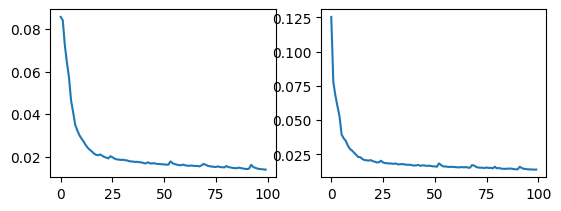

In [ ]:
plt.subplot(223)
plt.plot(h.history['loss'])
plt.subplot(224)
plt.plot(h.history['val_loss'])
    
plt.show()

In [ ]:
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity
mse = []
m1 = mean_squared_error(x_test, imagens_decodificadas)
print(f"MSE : {m1}")

MSE : 0.013980935139465881


# Convolucional Autoencoder 02




## Importações e Google drive


In [ ]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Input
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from zipfile import ZipFile
from tensorflow.keras.utils import load_img, img_to_array
import random
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense
random.seed(10)
print(random.seed(10))

None


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Baixando dataset e manipulando
dataset_dir = os.path.join(os.getcwd(), r'/content/drive')

dataset_train_dir = os.path.join(dataset_dir, r'/content/drive/MyDrive' )
dataset_train_color_len = len(os.listdir(os.path.join(dataset_train_dir, r'/content/drive/MyDrive/color')))



print('Imagem colorido: %s' % dataset_train_color_len)

Imagem colorido: 7125


In [ ]:
# Define o diretório do dataset
dataset_dir = "/content/drive/MyDrive/color"

# Lista todas as imagens do diretório
image_files = os.listdir(dataset_dir)

# Carrega as imagens e as converte em arrays
images = []
for file in image_files:
    img = load_img(os.path.join(dataset_dir, file), target_size=(156,156))
    img_array = img_to_array(img) / 255.0  # Normaliza os valores de pixel para o intervalo [0, 1]
    images.append(img_array)

In [ ]:
# Transformando as imagens em array
df = np.array(images[:2000])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(df, test_size = 0.30, random_state = 0)

In [ ]:
x_train.shape

(1400, 156, 156, 3)

In [ ]:
x_test.shape

(600, 156, 156, 3)

## Autoencoder Conv. 02

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
# AUTOENCODER 
autoencoder = Sequential()
# Encoder
autoencoder.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape=(156,156,3)))
autoencoder.add(MaxPooling2D(pool_size = (2,2)))

autoencoder.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size = (2,2), padding='same'))

autoencoder.add(Conv2D(filters = 128, kernel_size= (3,3), activation = 'relu', padding = 'same'))
autoencoder.add(MaxPooling2D(pool_size=(2,2)))


autoencoder.add(Conv2D(filters = 256, kernel_size = (3,3), activation = 'relu', padding='same', strides = (2,2)))
autoencoder.add(Flatten())
autoencoder.add(Reshape((10,10,256)))

# Decoder
autoencoder.add(Conv2D(filters = 256, kernel_size = (3,3), activation = 'relu', padding='same'))
autoencoder.add(UpSampling2D(size = (2,2)))

autoencoder.add(Conv2D(filters =128, kernel_size = (3,3), activation = 'relu', padding='same'))
autoencoder.add(UpSampling2D(size =(2,2)))

autoencoder.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding='same'))
autoencoder.add(UpSampling2D(size = (2,2)))


autoencoder.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
autoencoder.add(UpSampling2D(size = (2,2)))

autoencoder.add(Conv2D(filters = 3, kernel_size = (3,3), activation = 'sigmoid', padding='same'))


autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error',
                    metrics = ['accuracy'])

In [ ]:
autoencoder.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 154, 154, 64)      1792      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 77, 77, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 77, 77, 64)        36928     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 39, 39, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 39, 39, 128)       73856     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 19, 19, 128)     

In [ ]:
h = autoencoder.fit(x_train, x_train, 
                epochs=100, batch_size=10, validation_data=(x_test, x_test))

Epoch 1/100
140/140 [==============================] - 11s 40ms/step - loss: 0.0376 - accuracy: 0.4054 - val_loss: 0.0210 - val_accuracy: 0.6478
Epoch 2/100
140/140 [==============================] - 5s 35ms/step - loss: 0.0199 - accuracy: 0.6264 - val_loss: 0.0186 - val_accuracy: 0.7077
Epoch 3/100
140/140 [==============================] - 6s 41ms/step - loss: 0.0184 - accuracy: 0.6360 - val_loss: 0.0187 - val_accuracy: 0.6145
Epoch 4/100
140/140 [==============================] - 5s 39ms/step - loss: 0.0170 - accuracy: 0.6615 - val_loss: 0.0163 - val_accuracy: 0.6971
Epoch 5/100
140/140 [==============================] - 5s 39ms/step - loss: 0.0167 - accuracy: 0.6610 - val_loss: 0.0159 - val_accuracy: 0.6925
Epoch 6/100
140/140 [==============================] - 6s 45ms/step - loss: 0.0160 - accuracy: 0.6855 - val_loss: 0.0153 - val_accuracy: 0.7255
Epoch 7/100
140/140 [==============================] - 5s 35ms/step - loss: 0.0155 - accuracy: 0.7115 - val_loss: 0.0152 - val_accuracy

In [ ]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('flatten_4').output)

In [ ]:
imagens_codificadas = encoder.predict(x_test)
imagens_decodificadas = autoencoder.predict(x_test)

19/19 [==============================] - 2s 54ms/step


In [ ]:
autoencoder_json = autoencoder.to_json()
with open('autoencoder.json', 'w') as json_file:
    json_file.write(autoencoder_json)
autoencoder.save_weights('autoencoder.h5')

## Resultados

([], [])

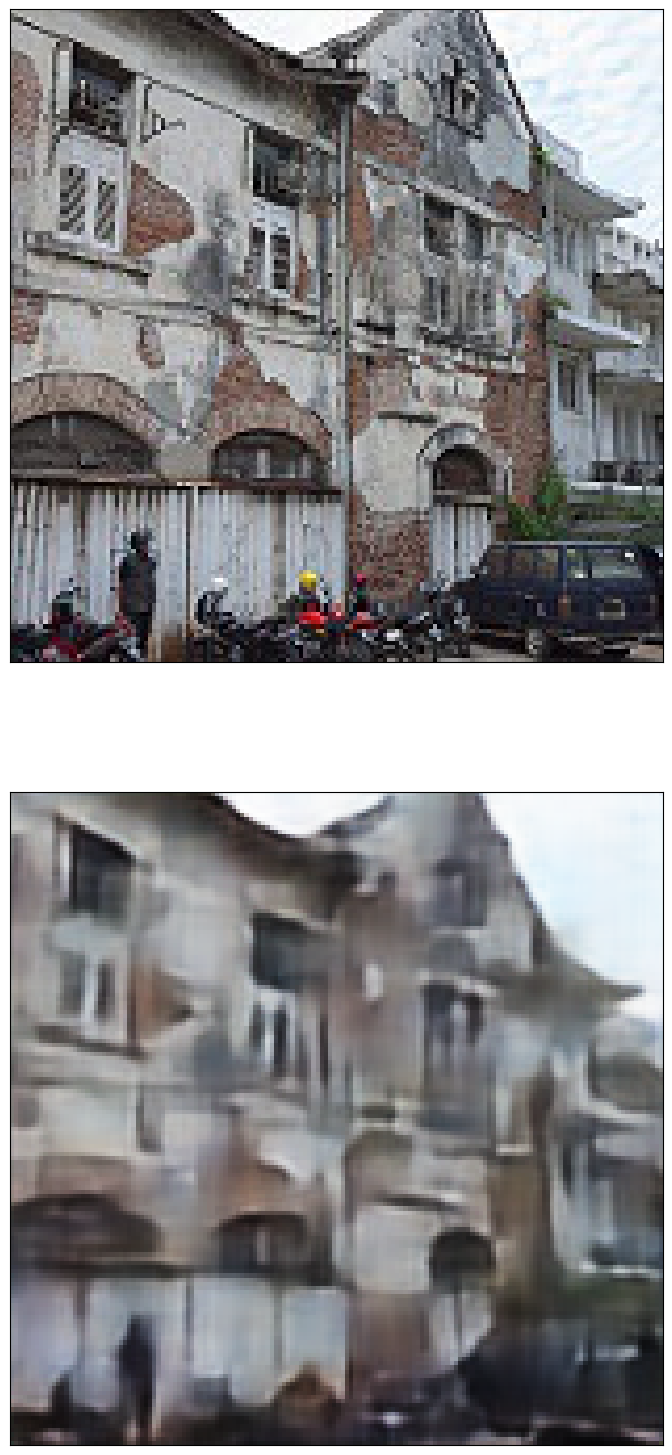

In [ ]:
indice_imagem = 8
plt.figure(figsize=(100, 100))
eixo = plt.subplot(10,10, i + 1)
plt.imshow(x_test[indice_imagem].reshape(156,156, 3))
plt.xticks(())
plt.yticks(())

eixo = plt.subplot(10, 10, 2 * numero_imagens + i + 1)
plt.imshow(imagens_decodificadas[indice_imagem].reshape(156,156, 3))
plt.xticks(())
plt.yticks(())

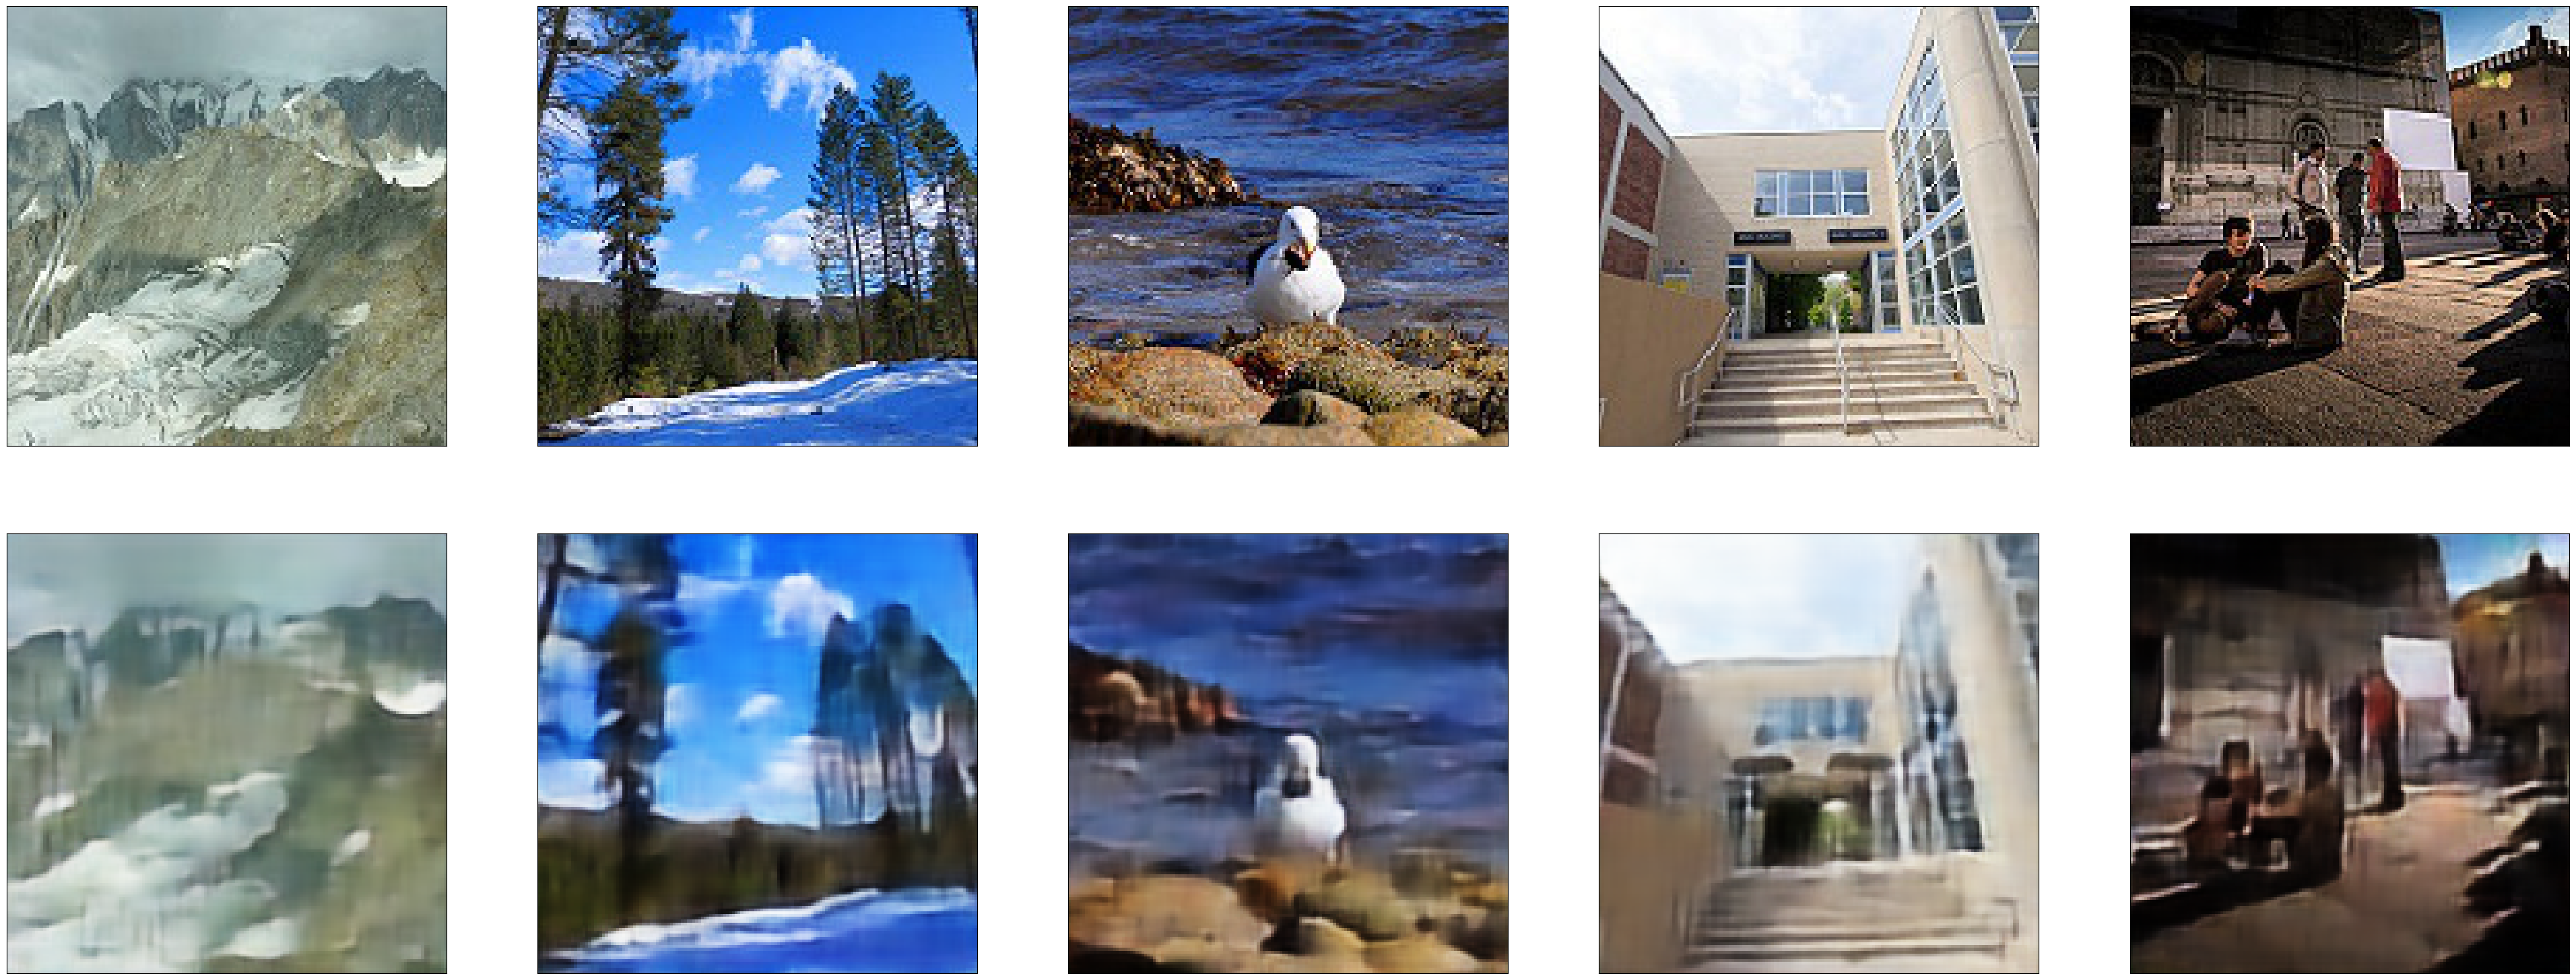

In [ ]:
numero_imagens = 5
imagens_teste = np.random.randint(x_test.shape[0], size=numero_imagens)
plt.figure(figsize=(100, 100))
for i, indice_imagem in enumerate(imagens_teste):
    # Imagem original, nas dimensões 32x32 com 3 canais
    eixo = plt.subplot(10,10, i + 1)
    plt.imshow(x_test[indice_imagem].reshape(156,156, 3))
    plt.xticks(())
    plt.yticks(())
    

    # Imagem decodificada, nas dimensões 32x32 com 3 canais
    eixo = plt.subplot(10, 10, 2 * numero_imagens + i + 1)
    plt.imshow(imagens_decodificadas[indice_imagem].reshape(156,156, 3))
    plt.xticks(())
    plt.yticks(())
plt.show()

In [ ]:
history = []
val_history = []

history.append(h.history['loss'])
val_history.append(h.history['val_loss'])

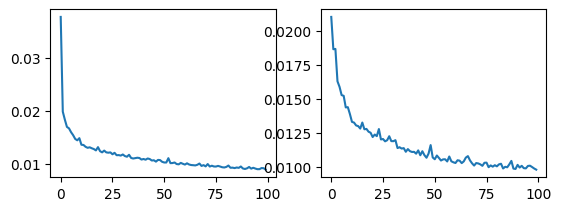

In [ ]:
plt.subplot(223)
plt.plot(h.history['loss'])
plt.subplot(224)
plt.plot(h.history['val_loss'])
    
plt.show()

In [ ]:
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity
mse = []
m1 = mean_squared_error(x_test, imagens_decodificadas)
print(f" MSE : {m1}")

 MSE : 0.009789801733921634


# Convolucional Autoencoder 03




## Importações e Google drive


In [ ]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Input
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from zipfile import ZipFile
from tensorflow.keras.utils import load_img, img_to_array
import random
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense
random.seed(10)
print(random.seed(10))

None


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Baixando dataset e manipulando
dataset_dir = os.path.join(os.getcwd(), r'/content/drive')

dataset_train_dir = os.path.join(dataset_dir, r'/content/drive/MyDrive' )
dataset_train_color_len = len(os.listdir(os.path.join(dataset_train_dir, r'/content/drive/MyDrive/color')))



print('Imagem colorido: %s' % dataset_train_color_len)

Imagem colorido: 7125


In [ ]:
# Define o diretório do dataset
dataset_dir = "/content/drive/MyDrive/color"

# Lista todas as imagens do diretório
image_files = os.listdir(dataset_dir)

# Carrega as imagens e as converte em arrays
images = []
for file in image_files:
    img = load_img(os.path.join(dataset_dir, file), target_size=(156,156))
    img_array = img_to_array(img) / 255.0  # Normaliza os valores de pixel para o intervalo [0, 1]
    images.append(img_array)

In [ ]:
# Transformando as imagens em array
df = np.array(images[:2000])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(df, test_size = 0.30, random_state = 0)

In [ ]:
x_train.shape

(1400, 156, 156, 3)

In [ ]:
x_test.shape

(600, 156, 156, 3)

## Autoencoder Conv. 03

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
# AUTOENCODER 
autoencoder = Sequential()
# Encoder
autoencoder.add(Conv2D(filters = 512, kernel_size = (3,3), activation = 'relu', input_shape=(156,156,3)))
autoencoder.add(MaxPooling2D(pool_size = (2,2)))


autoencoder.add(Conv2D(filters = 256, kernel_size = (3,3), activation = 'relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size = (2,2), padding='same'))

autoencoder.add(Conv2D(filters = 128, kernel_size= (3,3), activation = 'relu', padding = 'same'))
autoencoder.add(MaxPooling2D(pool_size=(2,2)))

autoencoder.add(Conv2D(filters = 64, kernel_size= (3,3), activation = 'relu', padding = 'same'))
autoencoder.add(MaxPooling2D(pool_size=(2,2)))


autoencoder.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding='same', strides = (2,2)))

autoencoder.add(Flatten())

autoencoder.add(Reshape((5,5,32)))

# Decoder
autoencoder.add(Conv2D(filters =32, kernel_size = (3,3), activation = 'relu', padding='same'))
autoencoder.add(UpSampling2D(size =(2,2)))

autoencoder.add(Conv2D(filters =64, kernel_size = (3,3), activation = 'relu', padding='same'))
autoencoder.add(UpSampling2D(size =(2,2)))
autoencoder.add(Conv2D(filters =128, kernel_size = (3,3), activation = 'relu', padding='same'))
autoencoder.add(UpSampling2D(size =(2,2)))

autoencoder.add(Conv2D(filters = 256, kernel_size = (3,3), activation = 'relu', padding='same'))
autoencoder.add(UpSampling2D(size = (2,2)))


autoencoder.add(Conv2D(filters = 512, kernel_size = (3,3), activation = 'relu'))
autoencoder.add(UpSampling2D(size = (2,2)))

autoencoder.add(Conv2D(filters = 3, kernel_size = (3,3), activation = 'sigmoid', padding='same'))


autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error',
                    metrics = ['accuracy'])

In [ ]:
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 154, 154, 512)     14336     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 77, 77, 512)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 77, 77, 256)       1179904   
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 39, 39, 256)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 39, 39, 128)       295040    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 19, 19, 128)     

In [ ]:
h = autoencoder.fit(x_train, x_train, 
                epochs=100, batch_size=10, validation_data=(x_test, x_test))

Epoch 1/100
140/140 [==============================] - 55s 237ms/step - loss: 0.0394 - accuracy: 0.4345 - val_loss: 0.0299 - val_accuracy: 0.4341
Epoch 2/100
140/140 [==============================] - 32s 229ms/step - loss: 0.0286 - accuracy: 0.4894 - val_loss: 0.0268 - val_accuracy: 0.5903
Epoch 3/100
140/140 [==============================] - 33s 233ms/step - loss: 0.0261 - accuracy: 0.5740 - val_loss: 0.0241 - val_accuracy: 0.6118
Epoch 4/100
140/140 [==============================] - 33s 235ms/step - loss: 0.0235 - accuracy: 0.6040 - val_loss: 0.0230 - val_accuracy: 0.6588
Epoch 5/100
140/140 [==============================] - 32s 229ms/step - loss: 0.0226 - accuracy: 0.6209 - val_loss: 0.0223 - val_accuracy: 0.6392
Epoch 6/100
140/140 [==============================] - 32s 231ms/step - loss: 0.0222 - accuracy: 0.6336 - val_loss: 0.0219 - val_accuracy: 0.5935
Epoch 7/100
140/140 [==============================] - 32s 229ms/step - loss: 0.0226 - accuracy: 0.6205 - val_loss: 0.0232 -

In [ ]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('flatten_1').output)

In [ ]:
imagens_codificadas = encoder.predict(x_test)
imagens_decodificadas = autoencoder.predict(x_test)

19/19 [==============================] - 10s 357ms/step


##Resultado

([], [])

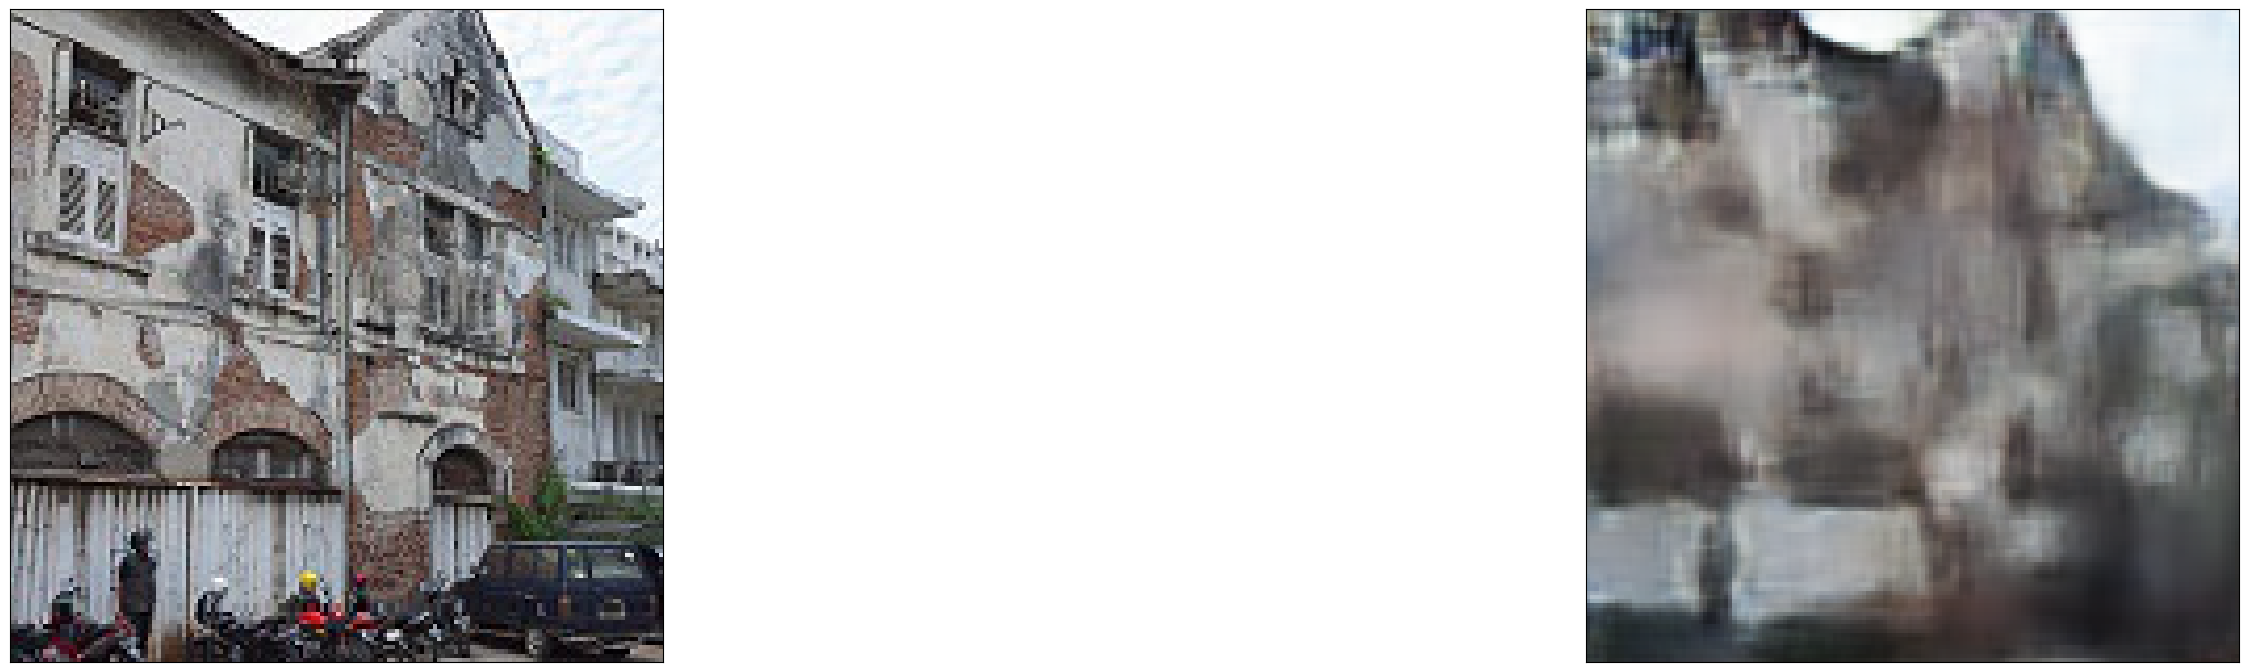

In [ ]:
indice_imagem = 8
plt.figure(figsize=(100, 100))
eixo = plt.subplot(10,10, i + 1)
plt.imshow(x_test[indice_imagem].reshape(156,156, 3))
plt.xticks(())
plt.yticks(())

eixo = plt.subplot(10, 10, 2 * numero_imagens + i + 1)
plt.imshow(imagens_decodificadas[indice_imagem].reshape(156,156, 3))
plt.xticks(())
plt.yticks(())

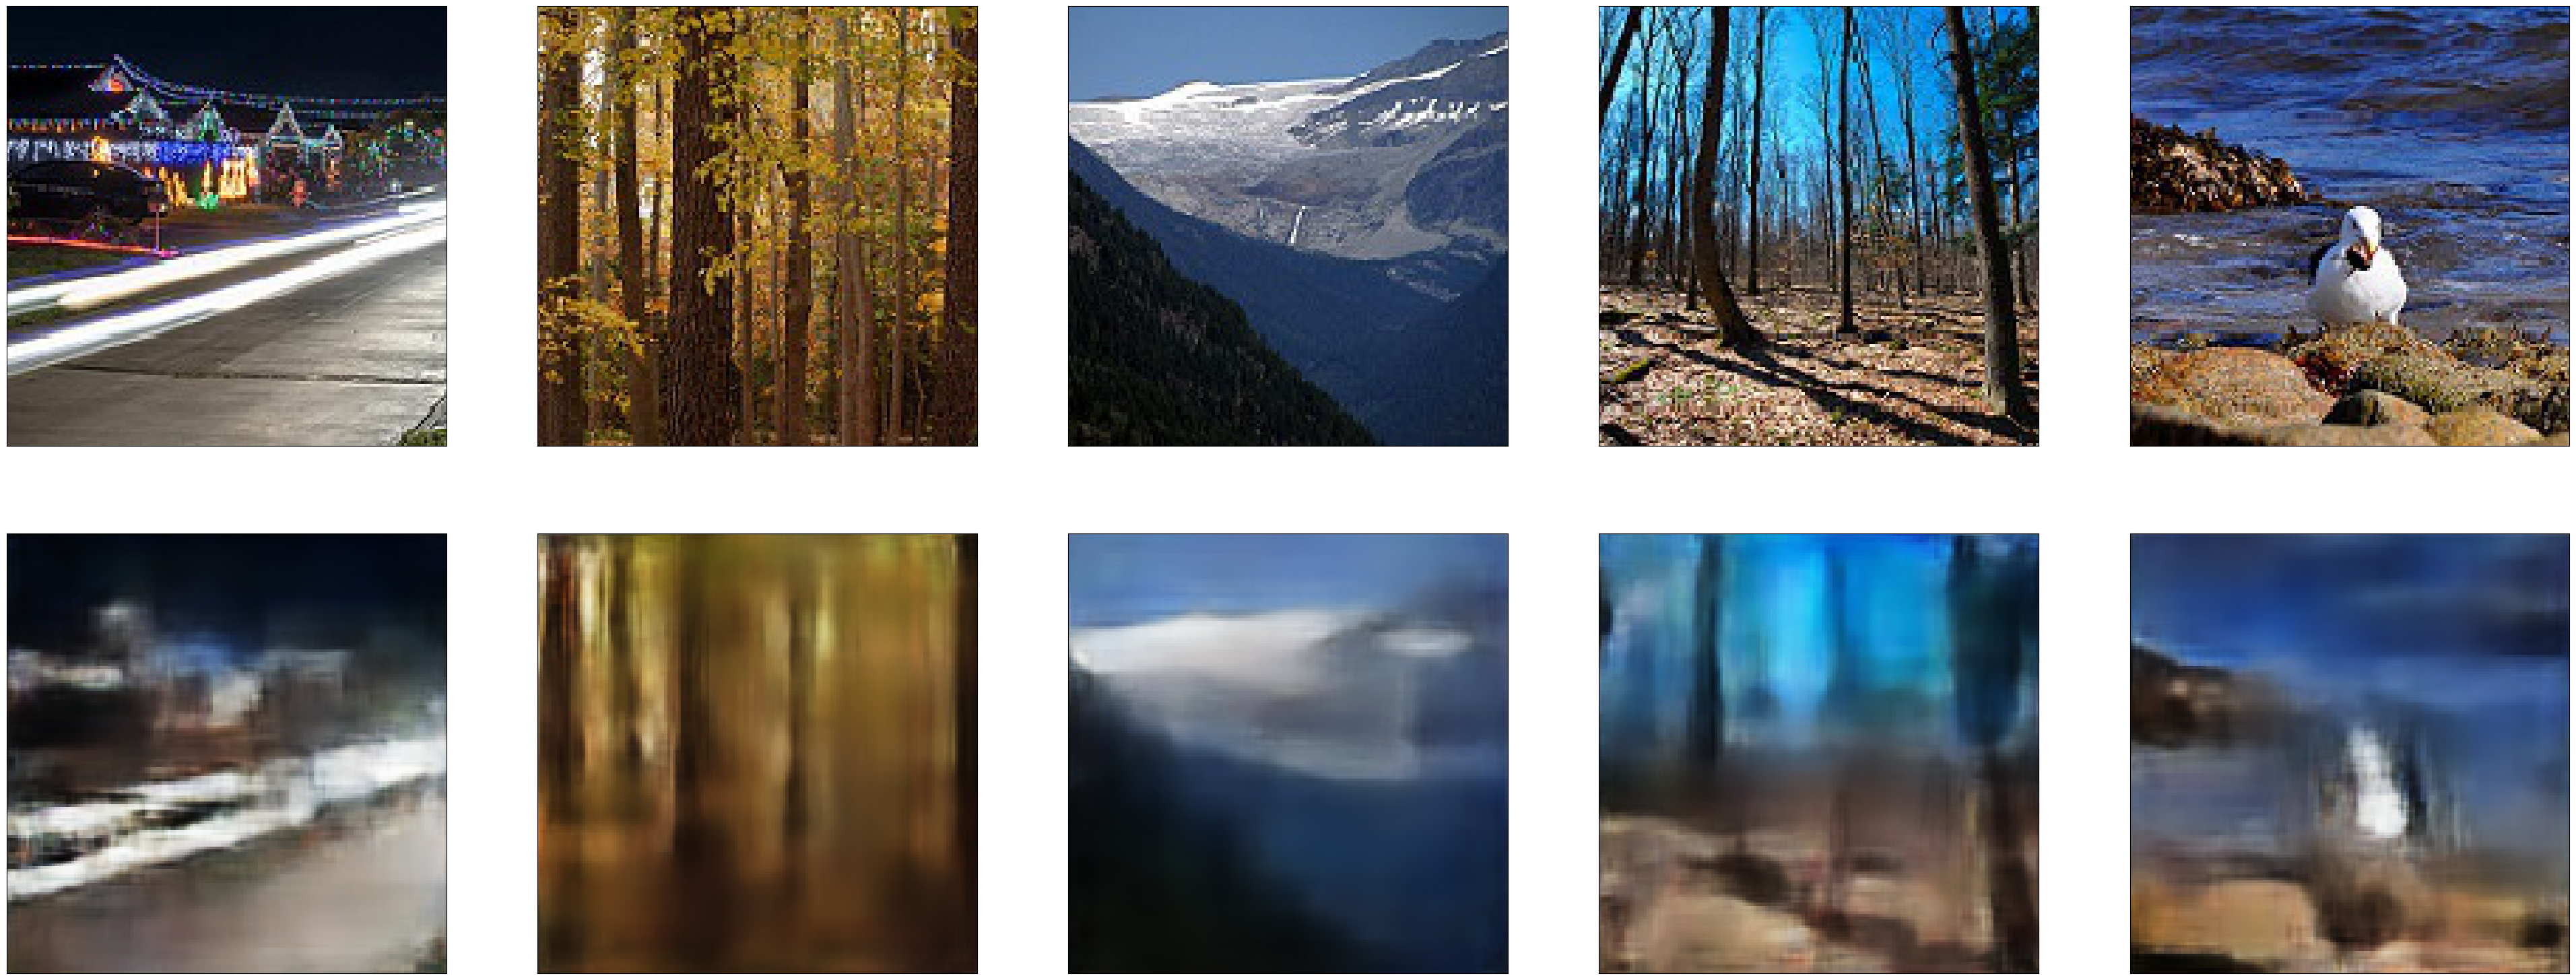

In [ ]:
numero_imagens = 5
imagens_teste = np.random.randint(x_test.shape[0], size=numero_imagens)
plt.figure(figsize=(100, 100))
for i, indice_imagem in enumerate(imagens_teste):
    # Imagem original
    eixo = plt.subplot(10,10, i + 1)
    plt.imshow(x_test[indice_imagem].reshape(156,156, 3))
    plt.xticks(())
    plt.yticks(())


    # Imagem decodificada
    eixo = plt.subplot(10, 10, 2 * numero_imagens + i + 1)
    plt.imshow(imagens_decodificadas[indice_imagem].reshape(156,156, 3))
    plt.xticks(())
    plt.yticks(())
plt.show()

In [ ]:
history = []
val_history = []

history.append(h.history['loss'])
val_history.append(h.history['val_loss'])

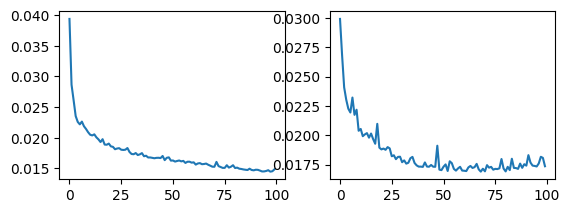

In [ ]:
plt.subplot(223)
plt.plot(h.history['loss'])
plt.subplot(224)
plt.plot(h.history['val_loss'])
    
plt.show()

In [ ]:
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity
mse = []
m1 = mean_squared_error(x_test, imagens_decodificadas)
print(f" {m1}")

 0.017352082040223017
